# YOLOv1 from scratch with PyTorch

https://arxiv.org/abs/1506.02640

### Imports

In [1]:
import torch
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from model import YOLOv1
from dataset import VOCDataset
from loss import YOLOv1Loss
from utils import (
    load_checkpoint,
    ComposeDetectionTransforms,
    trainable_parameters,
)
from train import train
from test import test_model

### Constants

In [2]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 20
WEIGHT_DECAY = 0
EPOCHS = 20
NUM_WORKERS = 6
PIN_MEMORY = True
LOAD_MODEL = True
LOAD_MODEL_FILE = "yolov1-20.pt"
LOAD_MODEL_EPOCH = 10
# https://www.kaggle.com/datasets/aladdinpersson/pascalvoc-yolo
IMG_DIR = "/data/Datasets/pascalvoc/images"
LABEL_DIR = "/data/Datasets/pascalvoc/labels"
TRAIN_CSV = "/data/Datasets/pascalvoc/train.csv"
TEST_CSV = "/data/Datasets/pascalvoc/test.csv"
SPLIT_SIZE = 7
NUM_BOXES = 2
NUM_CLASSES = 20
LINEAR_SIZE = 1024 # 4096 on original paper

### Initialization of the model

In [3]:
model = YOLOv1(split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES, linear_size=LINEAR_SIZE).to(DEVICE)
params = trainable_parameters(model)
print(f"Trainable parameters: {params}")
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
loss_fn = YOLOv1Loss(split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)

if LOAD_MODEL:
    load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)

Trainable parameters: 103617918
=> Loading checkpoint


### Initialization of the training dataset/dataloader

In [4]:
transform = ComposeDetectionTransforms([transforms.Resize((448, 448)), transforms.ToTensor()])

train_dataset = VOCDataset(
    "/data/Datasets/pascalvoc/train.csv",
    transform=transform,
    img_dir=IMG_DIR,
    label_dir=LABEL_DIR,
    split_size=SPLIT_SIZE,
    num_boxes=NUM_BOXES,
    num_classes=NUM_CLASSES,
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=True,
)

### Model training

In [ ]:
train(model, train_loader, optimizer, loss_fn, DEVICE, EPOCHS, start_epoch=LOAD_MODEL_EPOCH, 
          split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)

### Initialization of the testing dataset/dataloader

In [5]:
test_dataset = VOCDataset(
    "/data/Datasets/pascalvoc/test.csv",
    transform=transform,
    img_dir=IMG_DIR,
    label_dir=LABEL_DIR,
    split_size=SPLIT_SIZE,
    num_boxes=NUM_BOXES,
    num_classes=NUM_CLASSES,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    shuffle=True,
    drop_last=True,
)

### Plot some predictions on the test dataset

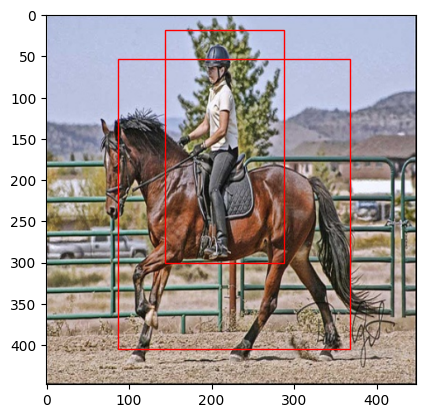

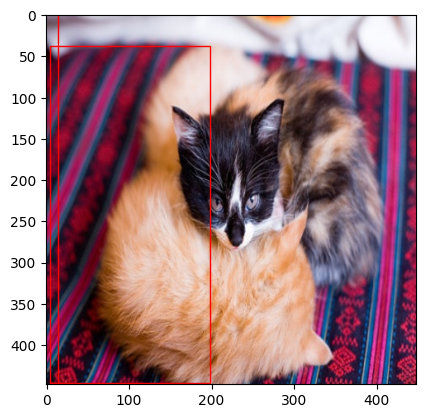

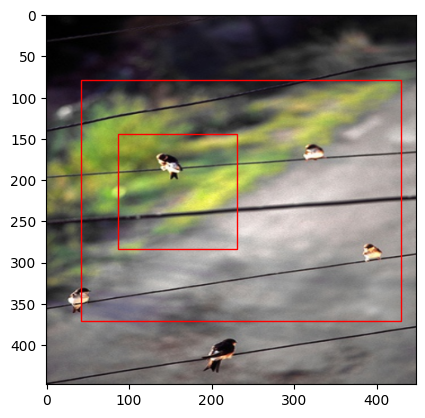

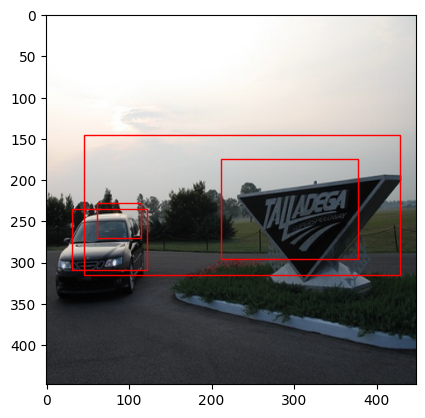

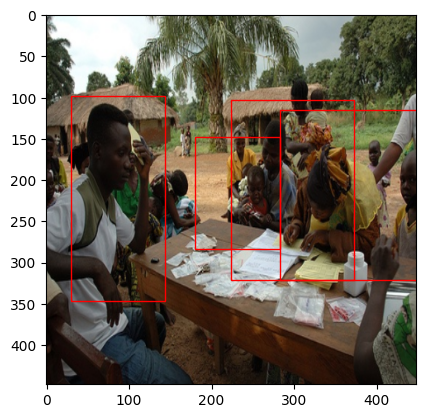

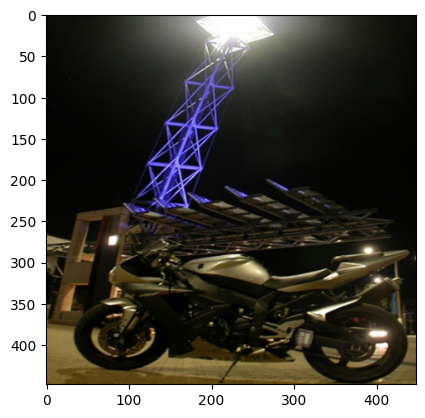

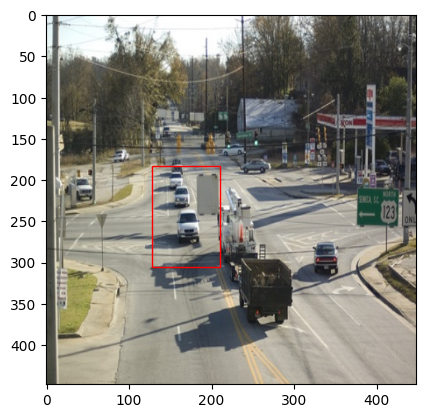

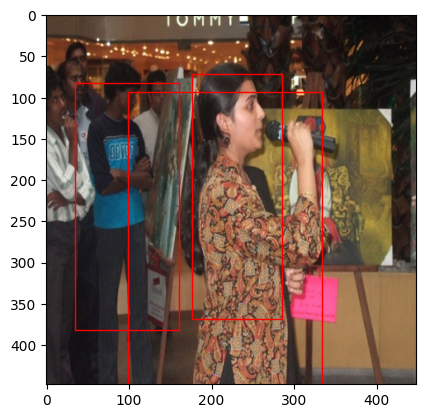

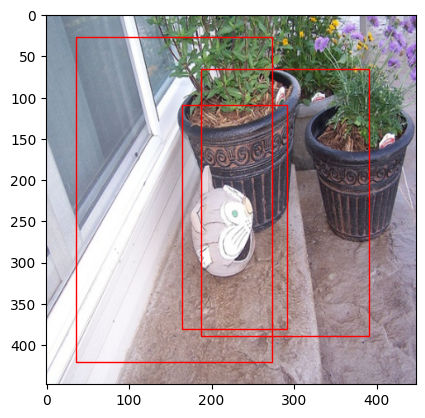

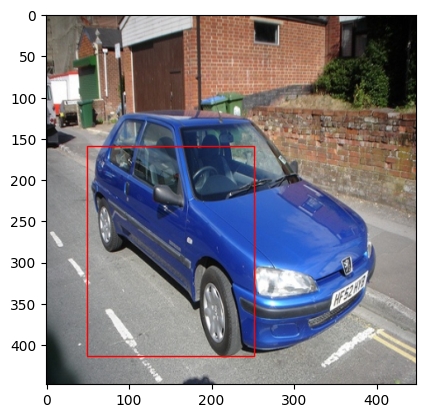

In [7]:
test_model(10, model, test_loader, DEVICE, split_size=SPLIT_SIZE, num_boxes=NUM_BOXES, num_classes=NUM_CLASSES)